In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [13]:
df = df.drop('id', axis = 1)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df.shape

(5110, 12)

In [5]:
df.info()
#w bmi są braki danych

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


* Zamienić gender na 0-1, analogicznie ever_married, work_type, Residence_type, smoking_status
* Usunąć id +
* zabezpieczyć braki danych w bmi
* sprawdzić dziwne wartości (typu wiek = 0 itp.):
    * sprawdzić min wiek - prawdopodobnie w work_type oznaczenie children oznacza, że to ejst dziecko i te wartości wieku będą ok
    * sprawdzić max bmi
    * sprawdzić zakresy poziomu glukozy (wg kaggle we krwi)
* zamienić nazwę Residence_type na residence_type
* Boxploty, korelacje, histogramy + rozkłady dla zmiennych ciągłych (czy są normalne lub zbliżone)
* sprawdzić wykresy dla bmi po uzupełnieniu NaN

In [24]:
col_list = df[['age', 'avg_glucose_level', 'bmi']].columns.tolist()

In [25]:
col_list

['age', 'avg_glucose_level', 'bmi']

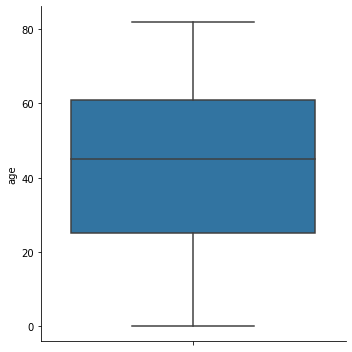

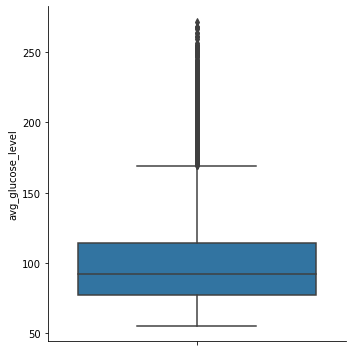

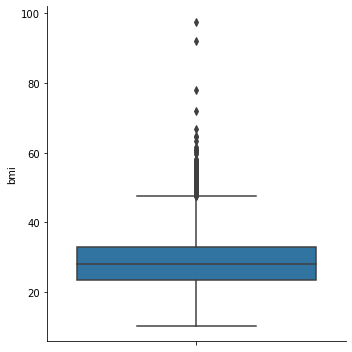

In [26]:
for var in col_list:
    sns.catplot(data=df, y=var, kind='box');

In [ ]:
features = df[col_list].values.tolist()

In [35]:
def histogram(df: pd.DataFrame, col_list: list, n_bin: int = 6):
    for col in col_list:
        plt.figure(figsize = (12,10))
        plt.hist(df[col], bins = n_bin)
        plt.title(col)

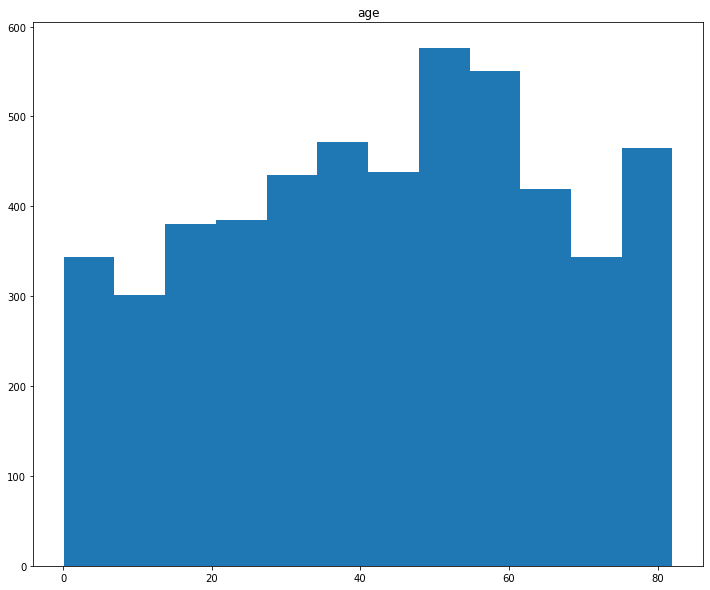

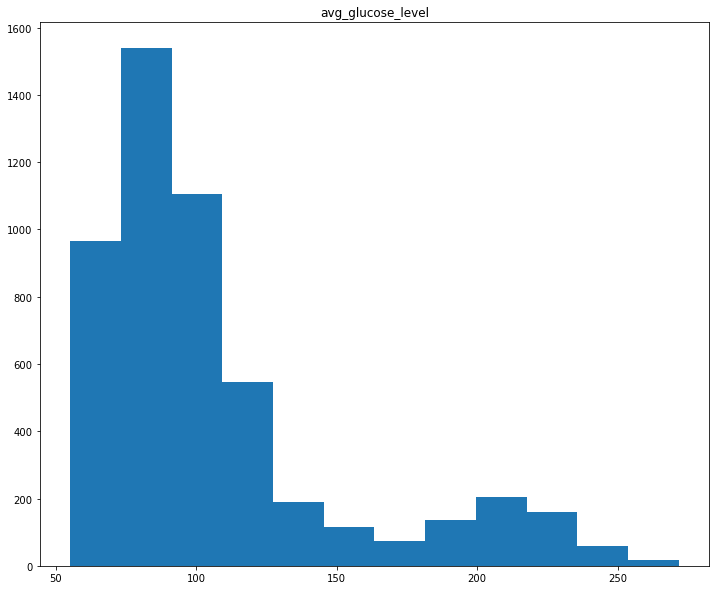

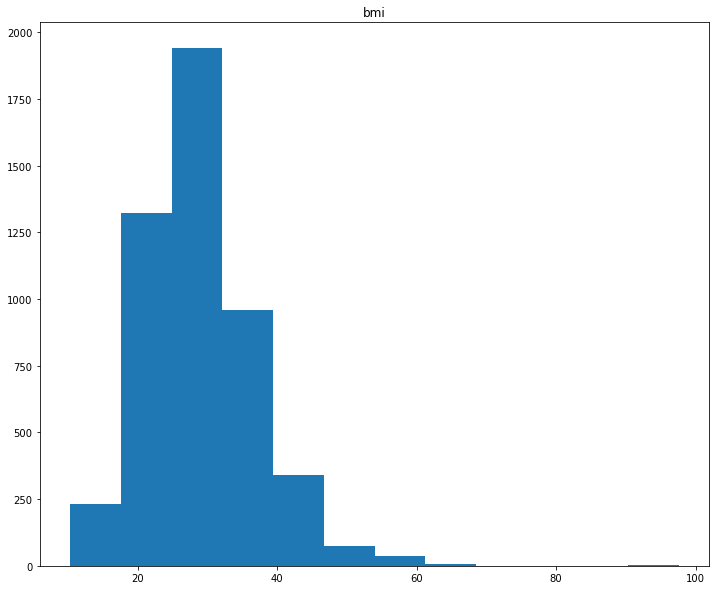

In [42]:
histogram(df, col_list=col_list, n_bin= 12 )

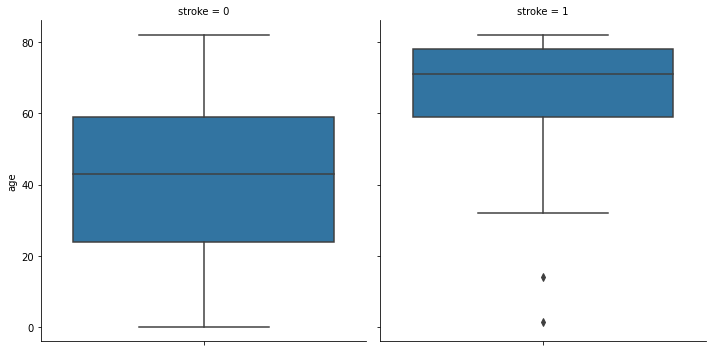

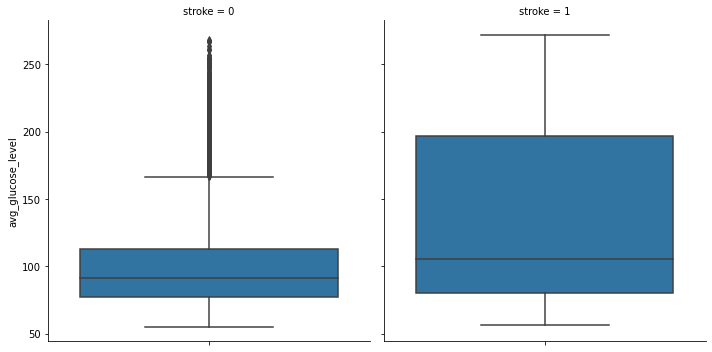

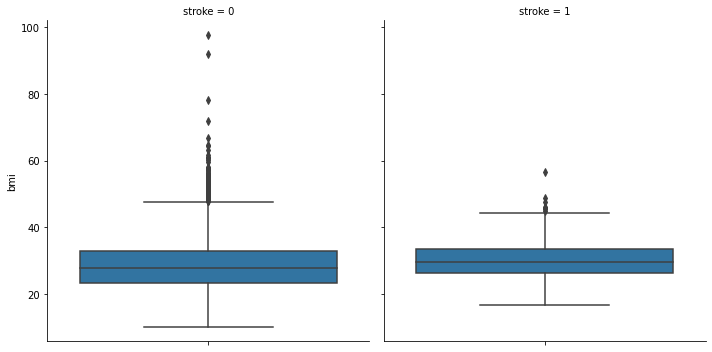

In [41]:
for var in col_list:
    sns.catplot(data=df, y=var, col = 'stroke', kind='box');